Advertising agency Test
In this little notebook, I'm going to carry out an A/B test to see if there is a difference between the responses of the control and exposed groups.

Descriptive analysis
Columns Description (I'm using the same description as op)

auction_id: the unique id of the online user who has been presented the BIO. In standard terminologies this is called an impression id. The user may see the BIO questionnaire but choose not to respond. In that case both the yes and no columns are zero.
experiment: which group the user belongs to - control or exposed.
control: users who have been shown a dummy ad
exposed: users who have been shown a creative, an online interactive ad, with the SmartAd brand.
date: the date in YYYY-MM-DD format
hour: the hour of the day in HH format.
device_make: the name of the type of device the user has e.g. Samsung
platform_os: the id of the OS the user has.
browser: the name of the browser the user uses to see the BIO questionnaire.
yes: 1 if the user chooses the “Yes” radio button for the BIO questionnaire.
no: 1 if the user chooses the “No” radio button for the BIO questionnaire.

In [2]:
import pandas as pd
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/AdSmartABdata - AdSmartABdata.csv')

First, let's check if there are any missing values in our database.

In [3]:
# Count the number of missing values in each column, if any
table_2 = df.isnull().sum()
print("Number of missing values per column:\n", table_2)

Number of missing values per column:
 auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64


Let's do some countingLet's do some counting

In [4]:
# Filter on users who responded
df_Responded = df[(df['yes'] == 1) | (df['no'] == 1)]

# Proportion of users who responded 'yes' by experiment type
df_Responded.groupby('experiment')['yes'].mean()

experiment
control    0.450512
exposed    0.468798
Name: yes, dtype: float64

In [5]:
# Proportion of users who responded 'yes' by experiment type and platform OS
df_Responded.groupby(['experiment','platform_os'])['yes'].mean()

experiment  platform_os
control     5              0.307692
            6              0.453752
exposed     5              0.250000
            6              0.470138
Name: yes, dtype: float64

Visualizations:
Bar Plot for Experiment Distribution:

<ipython-input-6-8b4c014fbb90>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='experiment', data=df, palette="Set2")


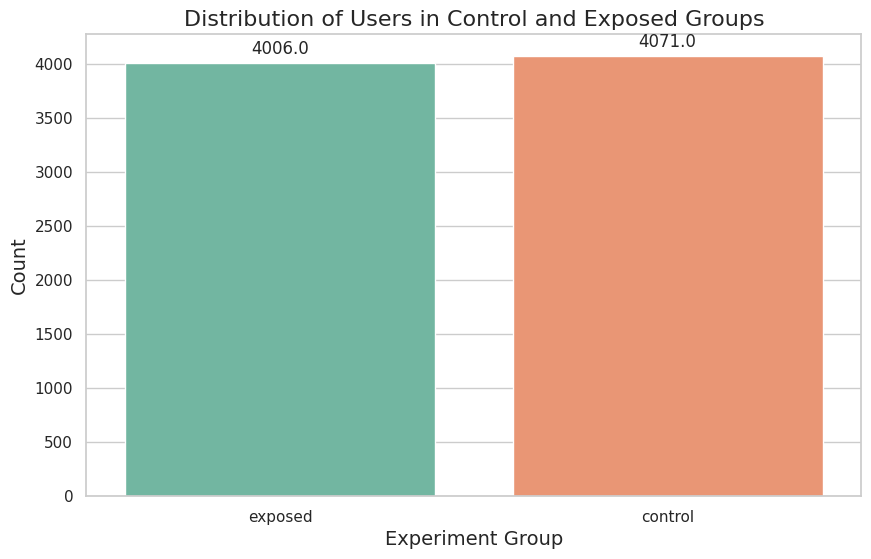

In [6]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='experiment', data=df, palette="Set2")
plt.title('Distribution of Users in Control and Exposed Groups', fontsize=16)
plt.xlabel('Experiment Group', fontsize=14)
plt.ylabel('Count', fontsize=14)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)
plt.show()

Histogram for Hour Distribution:

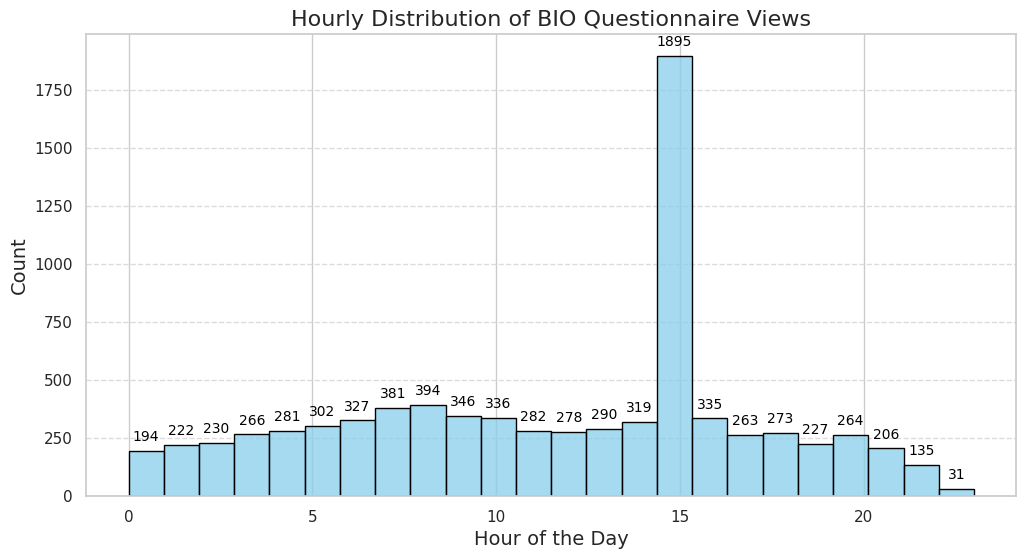

In [7]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(df['hour'], bins=24, kde=False, color='skyblue', edgecolor='black')

plt.title('Hourly Distribution of BIO Questionnaire Views', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')
plt.show()

Box Plot for Hour by Experiment:

<ipython-input-8-4154729b5b14>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='experiment', y='hour', data=df, palette="Set2")


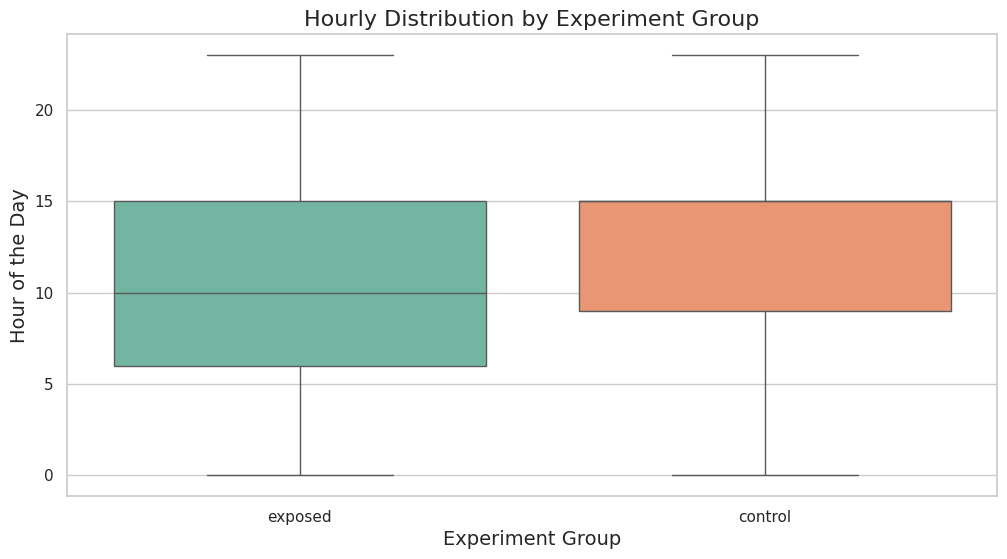

In [8]:
plt.figure(figsize=(12, 6))

ax = sns.boxplot(x='experiment', y='hour', data=df, palette="Set2")
#
for box, mean in zip(ax.artists):
    box.set_facecolor('white')
    box.set_edgecolor('black')
    box.set_linewidth(2)

#
plt.title('Hourly Distribution by Experiment Group', fontsize=16)
plt.xlabel('Experiment Group', fontsize=14)
plt.ylabel('Hour of the Day', fontsize=14)
plt.show()

In [9]:
median = df.groupby('experiment')['hour'].median().values
median

array([15., 10.])

Distribution for BIO Questionnaire

<ipython-input-10-f9ead06d57c4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='browser', data=df, palette="viridis")


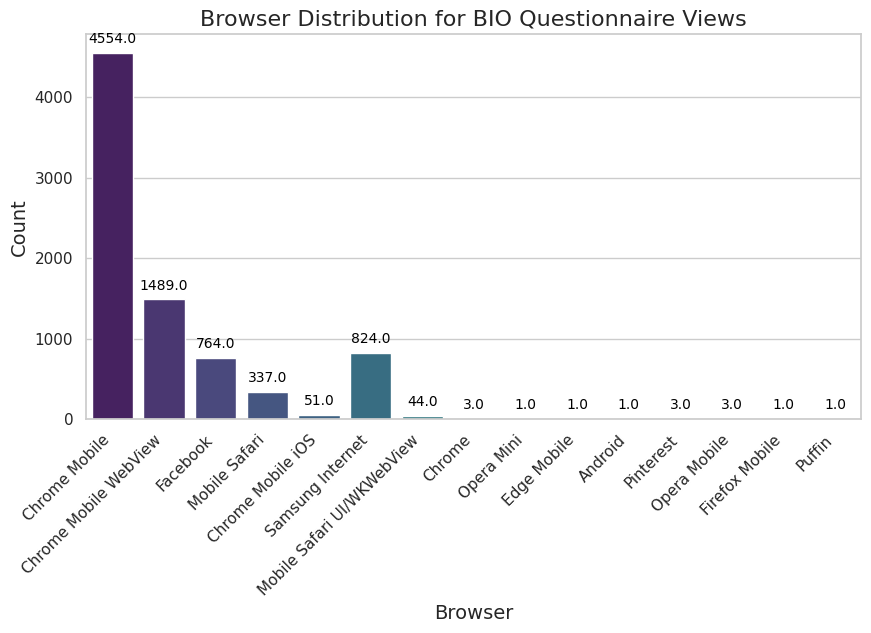

In [10]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='browser', data=df, palette="viridis")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

#
plt.title('Browser Distribution for BIO Questionnaire Views', fontsize=16)
plt.xlabel('Browser', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.show()

Timeline of responses

<ipython-input-11-19f04b8bb9d0>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  control_counts = control_data.groupby('date').sum()['yes']
<ipython-input-11-19f04b8bb9d0>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  exposed_counts = exposed_data.groupby('date').sum()['yes']


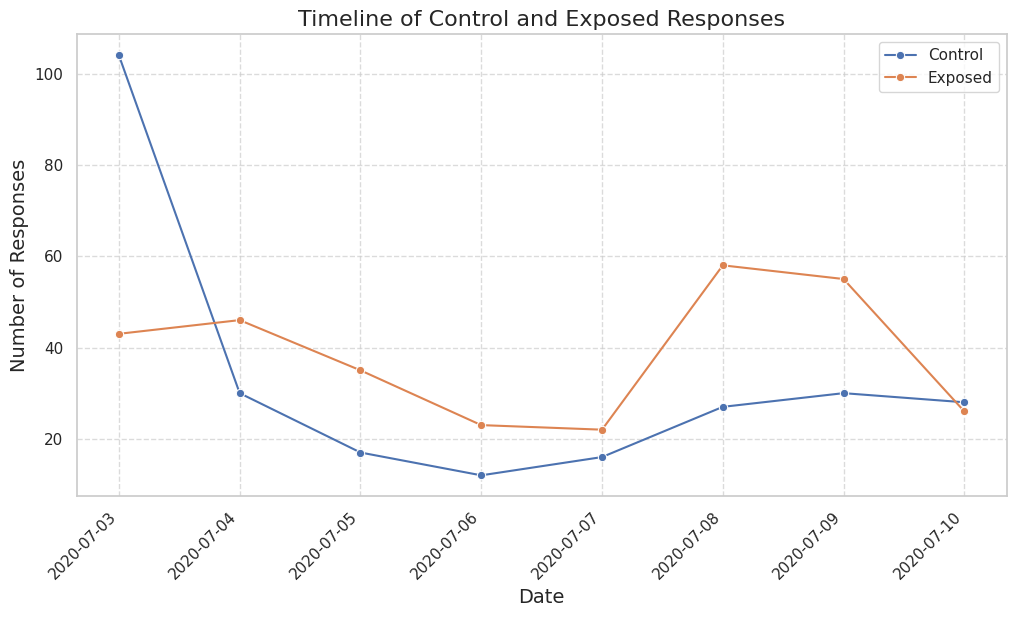

In [11]:
control_data = df[df['experiment'] == 'control']
exposed_data = df[df['experiment'] == 'exposed']

# Count responses for each date
control_counts = control_data.groupby('date').sum()['yes']
exposed_counts = exposed_data.groupby('date').sum()['yes']

plt.figure(figsize=(12, 6))
sns.lineplot(x=control_counts.index, y=control_counts.values, label='Control', marker='o')
sns.lineplot(x=exposed_counts.index, y=exposed_counts.values, label='Exposed', marker='o')
plt.title('Timeline of Control and Exposed Responses', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Responses', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')

plt.show()

Testing the hypotheses
We will check whether there is a significant association between the control and exposed groups in terms of the 'yes' answer. We have the following hypotheses:

Null Hypothesis (H0): There is no significant difference between the proportions of 'yes' answers in the control and exposed groups.
Alternative Hypothesis (H1): There is a significant difference between the proportions of 'yes' answers in the control and exposed groups.

In [12]:
# Count 'yes' and total for the control group
control_yes = control_data['yes'].sum()
control_total = control_data.shape[0]

# Count 'yes' and total for the exposed group
exposed_yes = exposed_data['yes'].sum()
exposed_total = exposed_data.shape[0]

z_stat, p_value = proportions_ztest([control_yes, exposed_yes], [control_total, exposed_total])
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

Z-statistic: -2.108290999972843
P-value: 0.035005825968324515
